<div class='alert alert-info' style='text-align: center;'>
<h1> Isaac Dadson, Ola Abolade, Emmanuel Sarpong & Ecclesiastes Aidoo</h1>
</div>

<div class='alert alert-info' style='text-align: center;'>
    <h2>Customer Segmentation Analysis Project</h2> 
</div>

<div class='alert alert-info' >
    
<h2 style='text-align: center;'><b>CUSTOMER SEGMENTATION ANALYSIS of an Online Retail Shop</b></h2>

<h3>Introduction</h3>
<h4>What is Retail?</h4>

<b>At its simplest definition, retail is the sale of different goods and services to customers with the intention of making a profit.</b>
    
Retailing has evolved and throughout its evolution, there has been the collection and storage of large volumes of data which has been used to improve sales and profit. 
    
<h3>Customer Segmentation</h3>
Customer segmentation refers to a method of dividing customers into groups or clusters on the basis of common characteristics such as customer demographics, purchasing patterns, interests, psychographics, etc. 

<h3>Problem Statement</h3> 

The Retail Shop is seeking to increase sales and improve customer satisfaction by analysing the data they've collected. 
    
They want to find a way to gain insights in their data in order to target the right customers for effective marketing campaigns and strategies, which is an effective way of utilizing resources and optimizing operations and hence boosting sales whiles increasing customer satisfaction. 

<h3>Objectives</h3>
The objectives of the project are to:
<ul>
<li>Calculate Customer Scoring metrics based on how frequent they buy, the recency of their purchases, how long they've been buying from the shop and the total amount of money they've spent in all their purchases.</li>
<li>Assign Loyalty levels to customers based on the calculated Customer Scoring Metrics in order to determine how loyal and important a customer is to the retail shop.</li>
<li>Segment the customers into groups by their similarity.</li>
<li>Analyze and describe characteristics of the segments</li>
</ul>    

<h3>Methodology</h3>  
<ol>
<li><b>Data Acquisition</b></li>
The dataset of the Retailed Company can be obtained from the UCI Machine learning repository.

<li><b>Data Cleaning and Exploratory Data Analysis</b></li>At this stage, data quality was ensured by cleaning and removing missing or wrong values such as negative values of sales and unit price percieved to be returned goods or data entry error.
    
<li><b>Feature engineering</b></li>At this stage, the metrics that are needed to carry out the customer scoring is extracted from the dataset.
The metrics include:
    
<b>Recency (R)</b> as days since last purchase: How many days ago was their last purchase? Deduct most recent purchase date from today to calculate the recency value. 1 day ago? 14 days ago? 500 days ago?

<b>Frequency (F)</b> as total number of transactions: How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10.

<b>Monetary (M)</b> as total money spent: How many $$ (or whatever is your currency of calculation) has this customer spent? Again limit to last two years – or take all time. Simply total up the money from all transactions to get the M value.

<b>Length of Relationship(LOR)</b> as how long the customer has traded with the shop: Calculated by taking the days difference of each customer's last day of purchase and first day of purchase.

<li><b>Customer Score Calculation and Loyalty Labelling</b></li><b>Customer Score</b>, is calculated as the sum of the monetary, recency, frequency and length of relationship metrics.
Based on the customer score, a loyalty level; Bronze, Silver, Gold or Platinum, is assigned each customer.

<li><b>Data Preprocessing and KMeans Modelling</b></li>
The metrics are transformed and The KMeans model is built using optimal clusters.

<li><b>Clusters Analysis</b></li>
Since the loyalty label is based on the customer scoring metrics, the clusters are analysed based on the loyalty labels that can be found therein. This would determine which clusters have the best customers and which doesn't.  
</ul>

<li><b>Conclusion and Recommendations</b></li>
Analysis Reports and recommendations.
</div>

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sidetable

## 1. Data acquisition

In [3]:
data = pd.read_csv('data.csv',parse_dates = ['InvoiceDate'],encoding= 'latin1')

## 2. Data Cleaning and Exploratory Data Analysis

In [4]:
#view first 5 observations

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# inspecting shape of the data

print('Rows: {} \nColumns: {}'.format(data.shape[0], data.shape[1]))

Rows: 541909 
Columns: 8


In [6]:
# converting column names to lower case

data.columns = data.columns.str.lower()
for column in data.columns:
    print(column)

invoiceno
stockcode
description
quantity
invoicedate
unitprice
customerid
country


In [7]:
#viewing first 5 rows after changes

data.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
#statistical inspection of numerical variables

data.describe()

,quantity,unitprice,customerid
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


> Columns quantity and unitprice have negative values which are unnatural for quantity and unit price of a product.

In [9]:
# checking the frequency of quantity to inspect rows with negative values

data.stb.freq(['quantity'])

,quantity,count,percent,cumulative_count,cumulative_percent
0,1,148227,27.352747,148227,27.352747
1,2,81829,15.100137,230056,42.452884
2,12,61063,11.268128,291119,53.721012
3,6,40868,7.541488,331987,61.262500
4,4,38484,7.101561,370471,68.364061
...,...,...,...,...,...
717,-5368,1,0.000185,541905,99.999262
718,-9058,1,0.000185,541906,99.999446
719,-9360,1,0.000185,541907,99.999631
720,-74215,1,0.000185,541908,99.999815


> 10, 624 quantity rows had negative values

In [10]:
data.loc[data.quantity < 0, ].shape[0]

10624

#### dropping the negative values

In [11]:
data = data[data.quantity > 0]
data.shape

(531285, 8)

In [12]:
data.quantity.describe()

count    531285.000000
mean         10.655262
std         156.830323
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64

In [13]:
data.loc[data.unitprice < 0, ].shape[0]

2

In [14]:
data = data[data.unitprice > 0]
data.shape

(530104, 8)

In [15]:
data.describe()

,quantity,unitprice,customerid
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


### Create new column sales, as a product of unitprice and quantity

In [16]:
data['sales'] = data.unitprice*data.quantity

In [17]:
data.describe()

,quantity,unitprice,customerid,sales
count,530104.000000,530104.000000,397884.000000,530104.000000
mean,10.542037,3.907625,15294.423453,20.121871
std,155.524124,35.915681,1713.141560,270.356743
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [18]:
# inspecting missing values

data.stb.missing()

,missing,total,percent
customerid,132220,530104,24.942275
invoiceno,0,530104,0.000000
stockcode,0,530104,0.000000
description,0,530104,0.000000
quantity,0,530104,0.000000
invoicedate,0,530104,0.000000
unitprice,0,530104,0.000000
country,0,530104,0.000000
sales,0,530104,0.000000


In [19]:
# Dropping all missing values

data = data.dropna()

In [20]:
data.stb.missing()

,missing,total,percent
invoiceno,0,397884,0.0
stockcode,0,397884,0.0
description,0,397884,0.0
quantity,0,397884,0.0
invoicedate,0,397884,0.0
unitprice,0,397884,0.0
customerid,0,397884,0.0
country,0,397884,0.0
sales,0,397884,0.0


In [21]:
data.describe()

,quantity,unitprice,customerid,sales
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,22.397000
std,179.331775,22.097877,1713.141560,309.071041
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [22]:
# inspecting categorical values

data.describe(include=[object])

,invoiceno,stockcode,description,country
count,397884,397884,397884,397884
unique,18532,3665,3877,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2035,2028,354321


In [23]:
# inspecting data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    397884 non-null  object        
 1   stockcode    397884 non-null  object        
 2   description  397884 non-null  object        
 3   quantity     397884 non-null  int64         
 4   invoicedate  397884 non-null  datetime64[ns]
 5   unitprice    397884 non-null  float64       
 6   customerid   397884 non-null  float64       
 7   country      397884 non-null  object        
 8   sales        397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [24]:
#inspect invoicedate

data.invoicedate.describe()

count                  397884
unique                  17282
top       2011-11-14 15:27:00
freq                      542
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: invoicedate, dtype: object

## 3. Feature Engineering

#### Snapshot date for calculating Recency

In [25]:
# create date(next day when data was collected) from which to subtract and find days since last purchase
from datetime import timedelta

# create date
last_date = data.invoicedate.max() + timedelta(days=1)
print('last transaction date: ', last_date)

last transaction date:  2011-12-10 12:50:00


In [26]:
# Grouping data by customerid

data['invoicedate2'] = data.invoicedate
data.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales,invoicedate2
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00


### Engineer required features: Recency, Frequency, Moneytary and Length of Relationship

In [27]:
customers = data.groupby(['customerid']).agg({
    'invoicedate':lambda x: (last_date - x.max()).days,
    'invoiceno': 'count',
    'sales': 'sum',
    'invoicedate2':lambda x: (x.max() - x.min()).days
})

customers.head()

,invoicedate,invoiceno,sales,invoicedate2
customerid,,,,
12346.0,326,1,77183.60,0
12347.0,2,182,4310.00,365
12348.0,75,31,1797.24,282
12349.0,19,73,1757.55,0
12350.0,310,17,334.40,0


In [28]:
# rename columns

customers.rename(columns={'invoicedate':'recency',
                         'invoiceno': 'frequency',
                         'sales': 'monetary',
                         'invoicedate2':'length_of_relationship'}, inplace=True)
customers.head()

,recency,frequency,monetary,length_of_relationship
customerid,,,,
12346.0,326,1,77183.60,0
12347.0,2,182,4310.00,365
12348.0,75,31,1797.24,282
12349.0,19,73,1757.55,0
12350.0,310,17,334.40,0


In [29]:
#check shape

print('Rows: {} \nColumns: {}'.format(customers.shape[0], customers.shape[1]))

Rows: 4338 
Columns: 4


In [30]:
# statistical description

customers.describe()

,recency,frequency,monetary,length_of_relationship
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,92.536422,91.720609,2054.266460,130.448594
std,100.014169,228.785094,8989.230441,132.039554
min,1.000000,1.000000,3.750000,0.000000
25%,18.000000,17.000000,307.415000,0.000000
50%,51.000000,41.000000,674.485000,92.500000
75%,142.000000,100.000000,1661.740000,251.750000
max,374.000000,7847.000000,280206.020000,373.000000


In [31]:
#inspection

customers.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   recency                 4338 non-null   int64  
 1   frequency               4338 non-null   int64  
 2   monetary                4338 non-null   float64
 3   length_of_relationship  4338 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 169.5 KB


### Calculate Recency, Frequency, Monetary and Length of relationship(lor) Score groups

> **frequency, monetary and lor groups were formed by dividing the column into 4 quartiles and assigning labels of 1-4, the higher the number, the longer the length of relationship**
> **For recency, the lower the values, the higher the score**

In [32]:
# create labels for recency, monetary, frequency and length of relationship

r = range(4, 0, -1)
m = range(1, 5)
f = range(1, 5)
l = [1, 2, 3, 4]

# assign labels to 4 equal percenttile groups

r_group = pd.qcut(customers.recency, q=4, labels=r)
m_group = pd.qcut(customers.monetary, q=4, labels=m)
f_group = pd.qcut(customers.frequency, q=4, labels=f)
lor_group = pd.qcut(customers.length_of_relationship, q=5, labels=l, duplicates='drop')

# add new group columns 
customers['r_score'] = r_group
customers['m_score'] =  m_group
customers['f_score'] = f_group
customers['lor_score'] = lor_group

customers.head()

,recency,frequency,monetary,length_of_relationship,r_score,m_score,f_score,lor_score
customerid,,,,,,,,
12346.0,326,1,77183.60,0,1,4,1,1
12347.0,2,182,4310.00,365,4,4,4,4
12348.0,75,31,1797.24,282,2,4,2,4
12349.0,19,73,1757.55,0,3,4,3,1
12350.0,310,17,334.40,0,1,2,1,1


In [33]:
#inspection

customers.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   recency                 4338 non-null   int64   
 1   frequency               4338 non-null   int64   
 2   monetary                4338 non-null   float64 
 3   length_of_relationship  4338 non-null   int64   
 4   r_score                 4338 non-null   category
 5   m_score                 4338 non-null   category
 6   f_score                 4338 non-null   category
 7   lor_score               4338 non-null   category
dtypes: category(4), float64(1), int64(3)
memory usage: 187.0 KB


In [34]:
scores = ['r_score', 'm_score', 'f_score', 'lor_score']

for score in scores:
    customers[score] = customers[score].astype(int)
    
customers.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   recency                 4338 non-null   int64  
 1   frequency               4338 non-null   int64  
 2   monetary                4338 non-null   float64
 3   length_of_relationship  4338 non-null   int64  
 4   r_score                 4338 non-null   int32  
 5   m_score                 4338 non-null   int32  
 6   f_score                 4338 non-null   int32  
 7   lor_score               4338 non-null   int32  
dtypes: float64(1), int32(4), int64(3)
memory usage: 237.2 KB


### Add all Score Values

In [35]:
def add_rmvf(x):
    return str(x['r_score']) + str(x['m_score']) + str(x['f_score']) + str(x['lor_score'])

In [36]:
customers['customer_score'] = customers.apply(add_rmvf, axis=1)

## 4. Customer Score calculation and Loyalty Labeling

In [37]:
customers['customer_score'] = customers[['r_score', 'f_score', 'm_score', 'lor_score']].sum(axis=1)
customers['customer_score'].head()

customerid
12346.0     7
12347.0    16
12348.0    12
12349.0    11
12350.0     5
Name: customer_score, dtype: int64

In [38]:
#view first 5 rows

customers.head()

,recency,frequency,monetary,length_of_relationship,r_score,m_score,f_score,lor_score,customer_score
customerid,,,,,,,,,
12346.0,326,1,77183.60,0,1,4,1,1,7
12347.0,2,182,4310.00,365,4,4,4,4,16
12348.0,75,31,1797.24,282,2,4,2,4,12
12349.0,19,73,1757.55,0,3,4,3,1,11
12350.0,310,17,334.40,0,1,2,1,1,5


In [39]:
customers.customer_score.describe()

count    4338.000000
mean        9.701706
std         3.743567
min         4.000000
25%         6.000000
50%        10.000000
75%        13.000000
max        16.000000
Name: customer_score, dtype: float64

In [40]:
customers.stb.freq(['customer_score'], style=True)

,customer_score,count,percent,cumulative_count,cumulative_percent
0,6,415,9.57%,415,9.57%
1,7,399,9.20%,814,18.76%
2,4,356,8.21%,"1,170",26.97%
3,5,349,8.05%,"1,519",35.02%
4,11,339,7.81%,"1,858",42.83%
5,10,333,7.68%,"2,191",50.51%
6,16,326,7.51%,"2,517",58.02%
7,8,321,7.40%,"2,838",65.42%
8,9,317,7.31%,"3,155",72.73%
9,13,309,7.12%,"3,464",79.85%


In [41]:
# summary of the metrics

customers.groupby('customer_score').agg({'recency':'mean','frequency':'mean', 'length_of_relationship':'mean', 'monetary':['mean','count']})

recency   frequency length_of_relationship      monetary  \
                      mean        mean                   mean          mean   
customer_score                                                                
4               265.938202    8.092697               0.300562    154.401910   
5               182.209169   13.171920               6.630372    230.953438   
6               154.906024   20.609639              10.860241    330.293641   
7               115.035088   25.037594              34.285714    722.040426   
8                95.775701   33.249221              53.137072    752.414299   
9                80.141956   43.507886              88.542587    739.854861   
10               63.681682   54.162162             128.504505    953.124808   
11               58.814159   68.029499             172.678466   1268.120357   
12               37.278523   88.167785             180.100671   2052.988456   
13               35.284790  114.689320             231.847896   1944.232168   
14               21.820339  171.257627             254.511864   2898.180746   
15               17.629893  209.911032             303.633452   4889.694875   
16                6.984663  414.358896             346.963190  11306.146810   

                      
               count  
customer_score        
4                356  
5                349  
6                415  
7                399  
8                321  
9                317  
10               333  
11               339  
12               298  
13               309  
14               295  
15               281  
16               326

### Assign Loyalty Level to each customer using the Customer Score

In [42]:
Loyalty_Levels = ['Bronze', 'Silver', 'Gold', 'Platinum']
loyalty_levels = pd.qcut(customers.customer_score, q = 4, labels = Loyalty_Levels)
customers['loyalty_level'] = loyalty_levels

In [43]:
customers.head()

,recency,frequency,monetary,length_of_relationship,r_score,m_score,f_score,lor_score,customer_score,loyalty_level
customerid,,,,,,,,,,
12346.0,326,1,77183.60,0,1,4,1,1,7,Silver
12347.0,2,182,4310.00,365,4,4,4,4,16,Platinum
12348.0,75,31,1797.24,282,2,4,2,4,12,Gold
12349.0,19,73,1757.55,0,3,4,3,1,11,Gold
12350.0,310,17,334.40,0,1,2,1,1,5,Bronze


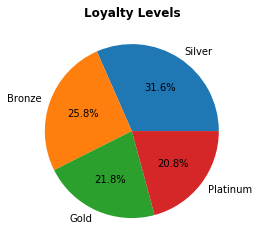

In [44]:
plt.pie(customers.loyalty_level.value_counts(), labels=customers.loyalty_level.value_counts().index, autopct='%1.1f%%')
plt.title('Loyalty Levels', weight='bold')
plt.show()

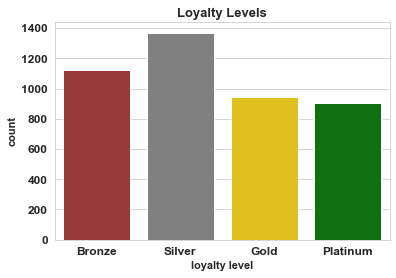

In [45]:
colors = ['brown', 'grey', 'gold', 'green']
sns.set_style('whitegrid')
sns.countplot(customers.loyalty_level, palette=colors)
plt.title('Loyalty Levels', fontsize=13, weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.xlabel('loyalty level', fontsize=11, weight='bold')
plt.ylabel('count', fontsize=11, weight='bold')
plt.show()

In [46]:
customers.groupby('loyalty_level').agg({'recency':'mean','frequency':'mean', 'length_of_relationship':'mean', 'monetary':['mean','count']}).style.background_gradient(cmap='Reds')

In [47]:
customers.stb.freq(['loyalty_level'], style=True)

,loyalty_level,count,percent,cumulative_count,cumulative_percent
0,Silver,"1,370",31.58%,"1,370",31.58%
1,Bronze,"1,120",25.82%,"2,490",57.40%
2,Gold,946,21.81%,"3,436",79.21%
3,Platinum,902,20.79%,"4,338",100.00%


> The **Platinum** segment, making up 20.79% of total customers, is the most loyal customers of the retail shop having the lowest average recency, highest average frequency, monetray and length of relationship.

> The **Gold** segment, making up 21.81% of total customers, come after Platinum having the 2nd lowest average recency, 2nd highest average frequency, monetray and length of relationship.

> The **Silver** segment, making up 25.82% of total customers, come after Gold in all the metrics.

> The **Bronze** segment, constituting 31.58% of total customers of the retail shop are the least loyal customers come last in all the metrics.

## 5. Data Preprocessing and KMeans Modelling

### Transformation

In [48]:
cols = ['recency', 'frequency', 'monetary', 'length_of_relationship']
cols

['recency', 'frequency', 'monetary', 'length_of_relationship']

In [49]:
X = customers[cols]
X.head()

,recency,frequency,monetary,length_of_relationship
customerid,,,,
12346.0,326,1,77183.60,0
12347.0,2,182,4310.00,365
12348.0,75,31,1797.24,282
12349.0,19,73,1757.55,0
12350.0,310,17,334.40,0


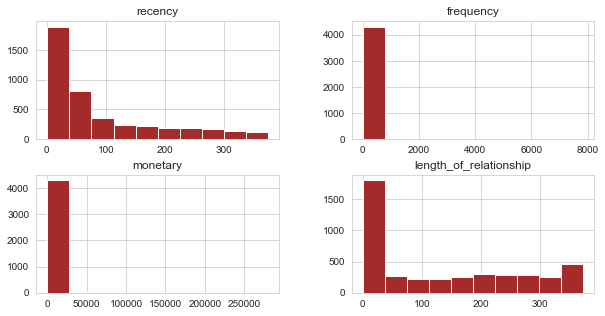

In [50]:
X.hist(figsize=(10,5), color='brown')
plt.show()

> From the graph, the variables are all right skewed and needs to be normalized using log transformation

#### Log transformation of Values

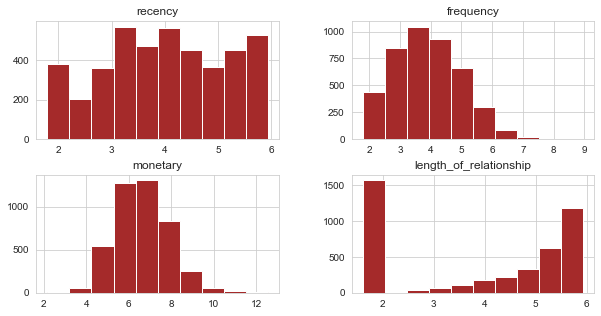

In [51]:
#using a constant of 5 since length of relationship has 0 values

for col in cols:
    X[col] = np.log(X[col] + 5)

X.hist(figsize=(10,5), color='brown')
plt.show()

### Scaling

> Variables need to be scaled and centered for the kmeans algorithm to perform well

In [52]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, index=customers.index, columns=cols)
X.head()

,recency,frequency,monetary,length_of_relationship
customerid,,,,
12346.0,1.570258,-1.937688,3.733464,-1.243881
12347.0,-1.787560,1.224120,1.417481,1.148304
12348.0,0.333704,-0.290516,0.716407,1.007120
12349.0,-0.714663,0.420280,0.698525,-1.243881
12350.0,1.527116,-0.743252,-0.624291,-1.243881


In [53]:
x_copy = X.copy()

#### Elbow method for finding optimal clusters
The clusters are the segments into which the customers will be grouped. To choose the best segments, the elbow method is used.

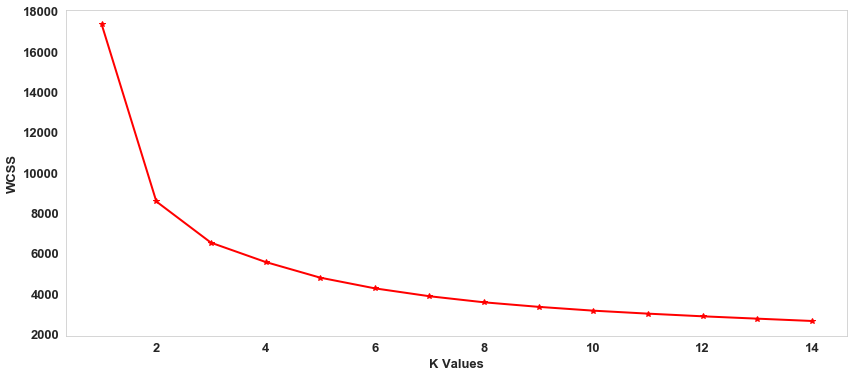

In [54]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))
plt.grid()
plt.plot(range(1,15), wcss, linewidth=2, color='red', marker='*')
plt.xlabel('K Values', fontsize=13, weight='bold')
plt.ylabel('WCSS', fontsize=13, weight='bold')
plt.xticks(fontsize=13, weight='bold')
plt.yticks(fontsize=13, weight='bold')
plt.show()

#### Optimal Cluster number = 3, the value at the elbow of the plots

In [55]:
kmeanss = KMeans(n_clusters=3, random_state=42)
cluster3 = kmeanss.fit_predict(X)
print(cluster3)

[1 0 2 ... 2 0 2]


In [56]:
customers.head()

,recency,frequency,monetary,length_of_relationship,r_score,m_score,f_score,lor_score,customer_score,loyalty_level
customerid,,,,,,,,,,
12346.0,326,1,77183.60,0,1,4,1,1,7,Silver
12347.0,2,182,4310.00,365,4,4,4,4,16,Platinum
12348.0,75,31,1797.24,282,2,4,2,4,12,Gold
12349.0,19,73,1757.55,0,3,4,3,1,11,Gold
12350.0,310,17,334.40,0,1,2,1,1,5,Bronze


In [57]:
customers['cluster'] = cluster3
customers.head()

,recency,frequency,monetary,length_of_relationship,r_score,m_score,f_score,lor_score,customer_score,loyalty_level,cluster
customerid,,,,,,,,,,,
12346.0,326,1,77183.60,0,1,4,1,1,7,Silver,1
12347.0,2,182,4310.00,365,4,4,4,4,16,Platinum,0
12348.0,75,31,1797.24,282,2,4,2,4,12,Gold,2
12349.0,19,73,1757.55,0,3,4,3,1,11,Gold,2
12350.0,310,17,334.40,0,1,2,1,1,5,Bronze,1


In [58]:
# grouping metrics and clusters
X = customers[['recency', 'frequency', 'monetary', 'length_of_relationship', 'cluster']]

## 6. Cluster Analysis

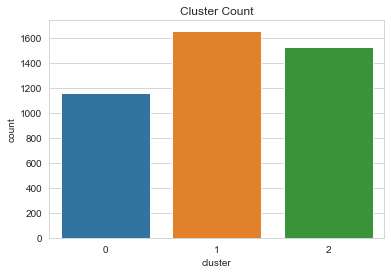

In [59]:
sns.set_style('whitegrid')
sns.countplot(customers.cluster)
plt.title('Cluster Count')
plt.show()

In [60]:
customers.stb.freq(['cluster'], style=True)

,cluster,count,percent,cumulative_count,cumulative_percent
0,1,"1,656",38.17%,"1,656",38.17%
1,2,"1,527",35.20%,"3,183",73.37%
2,0,"1,155",26.63%,"4,338",100.00%


> **Cluster 1 constitutes 1,656 (38.17%) of customers**

> **Cluster 2 constitutes 1,527 (35.20%) of customers**

> **Cluster 0 constitutes 1,155 (26.63%) of customers**

In [61]:
customers.groupby(['cluster']).agg({'recency':'mean','frequency':'mean', 'length_of_relationship':'mean', 'monetary':['mean','count']}).round(0).style.background_gradient(cmap='Greens')

#### Customers in Cluster 0
> Customers in cluster 0 are the most loyal customers who make purchase more than the other clusters.

> On average, they have the lowest recency of 20, made 244 transactions, been buying from the retail store the longest at a length of relationship of 269 and have the highest monetary value of 5819 but are of the smallest number of 1155.

>The Retail Shop can improve their satisfaction by customizing and personalizing some products they purchase and also give them discounts. These would help maintain them, hence sales would improve.

#### Customers in Cluster 1
> Customers in cluster 1 are the direct opposite of cluster 0 customers. They are the least loyal customers who on average, have the highest recency of 159, made only 21 transactions, been buying from the retial store the shortest at a length of relationship of 3 and have the lowest monetary value of 396.

>The Retail Shop with this insight can come up with marketing strategies to attract these customers.

#### Customers in Cluster 2
> Customers in cluster 2 are the second best customers of the Retail shop. On average,  they have the 2nd best recency of 75, made 53 transactions and been purchasing from the store 2nd longest with length of relationship of 164 and a monetary value of 1527.

>Just like customers in cluster 0, strategies need to be put in place to attract these customers to move them to cluster 2 and also maintain them.

### Cluster Comparisom with regards to Loyalty Levels

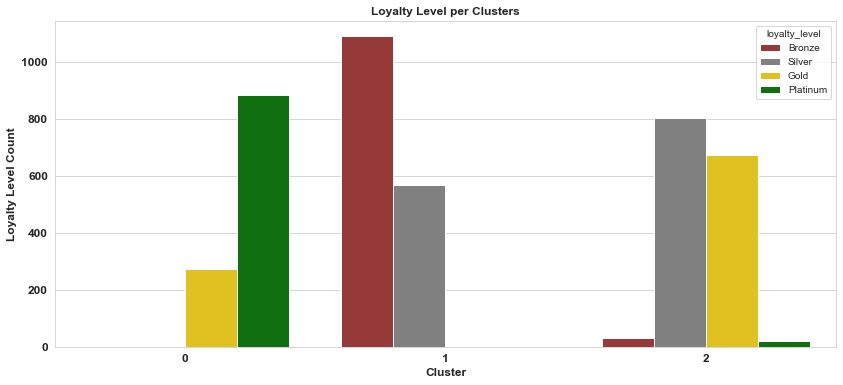

In [62]:
colors = ['brown', 'grey', 'gold', 'green']

sns.set_style('whitegrid')
plt.figure(figsize=(14, 6))
sns.countplot(customers.cluster, hue=customers.loyalty_level, palette=colors)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.xlabel('Cluster', fontsize=12, weight='bold')
plt.ylabel('Loyalty Level Count', fontsize=12, weight='bold')
plt.title('Loyalty Level per Clusters', weight='bold')
plt.show()

##### From the plot above:
> **Cluster 0 is the best**, constituting of about **99% of Platinum loyalty** and **30% Gold loyalty**

> **Cluster 1 is the least**, constituting of about **99% of Bronze loyalty** and about **40% of Silver loyalty**

> **Cluster 2 is the 2nd best**, constituting of about **75% and 60% of Silver and Gold loyalties**  respectively.

### Visualizing clusters with regards to the metrics

In [63]:
x_copy['cluster'] = cluster3
x_copy.head()

,recency,frequency,monetary,length_of_relationship,cluster
customerid,,,,,
12346.0,1.570258,-1.937688,3.733464,-1.243881,1
12347.0,-1.787560,1.224120,1.417481,1.148304,0
12348.0,0.333704,-0.290516,0.716407,1.007120,2
12349.0,-0.714663,0.420280,0.698525,-1.243881,2
12350.0,1.527116,-0.743252,-0.624291,-1.243881,1


#### melting the data

In [71]:
dataM = pd.melt(x_copy.reset_index(), id_vars=['customerid', 'cluster'],
               value_vars=['recency', 'frequency', 'monetary', 'length_of_relationship'],
               var_name='Attribute', value_name='Value')
dataM.head()

,customerid,cluster,Attribute,Value
0,12346.0,1,recency,1.570258
1,12347.0,0,recency,-1.787560
2,12348.0,2,recency,0.333704
3,12349.0,2,recency,-0.714663
4,12350.0,1,recency,1.527116


In [72]:
dataM.tail()

,customerid,cluster,Attribute,Value
17347,18280.0,1,length_of_relationship,-1.243881
17348,18281.0,1,length_of_relationship,-1.243881
17349,18282.0,2,length_of_relationship,0.536195
17350,18283.0,0,length_of_relationship,1.098028
17351,18287.0,2,length_of_relationship,0.692688


### Visualizing clusters using a snake plot

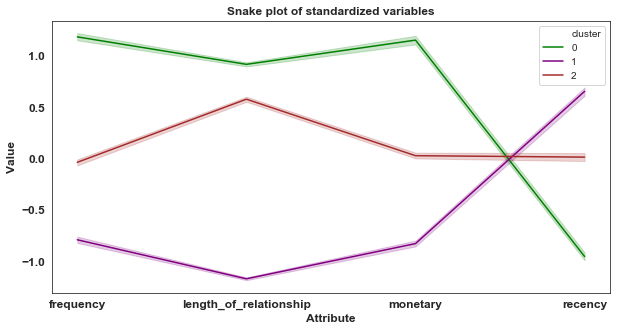

In [73]:
colors = ['green', 'purple', 'brown']
sns.set_style('white')
plt.figure(figsize = (10,5))
plt.title('Snake plot of standardized variables', fontsize=12, weight='bold')
sns.lineplot(x='Attribute', y='Value', hue='cluster', data=dataM, palette=colors)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.xlabel('Attribute', fontsize=12, weight='bold')
plt.ylabel('Value', fontsize=12, weight='bold')
plt.show()

> **Considering the snake plot above, cluster 0 has the lowest recency and highest frequency, monetary and length of relationship hence the most loyal and beneficial group of customers for the retail shop.**

> **Cluster 1 has the highest recency and lowest frequency, monetary and length of relationship making them the least loyal customers of the retail shop.**

> **Cluster 2 is second best group having next lowest recency and next highest recency, frequency and length of relationship.**

In [155]:
data.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales,invoicedate2
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00


### Relative Importance

In [74]:
X.head()

,recency,frequency,monetary,length_of_relationship,cluster
customerid,,,,,
12346.0,326,1,77183.60,0,1
12347.0,2,182,4310.00,365,0
12348.0,75,31,1797.24,282,2
12349.0,19,73,1757.55,0,2
12350.0,310,17,334.40,0,1


In [75]:
cluster_avg = X.groupby(['cluster']).mean()
population_avg = X[['recency','frequency','monetary', 'length_of_relationship']].mean()
relative_importance = cluster_avg/population_avg-1

In [79]:
cluster_avg.round(2).style.background_gradient(cmap='BuPu')

,recency,frequency,monetary,length_of_relationship
cluster,,,,
0,19.580000,243.850000,5819.350000,269.320000
1,159.190000,21.370000,396.370000,2.560000
2,75.440000,52.940000,1004.370000,164.100000


In [113]:
relative_importance.round(2).style.background_gradient(cmap='BuPu')

,recency,frequency,monetary,length_of_relationship
cluster,,,,
0,-0.790000,1.660000,1.830000,1.060000
1,0.720000,-0.770000,-0.810000,-0.980000
2,-0.180000,-0.420000,-0.510000,0.260000


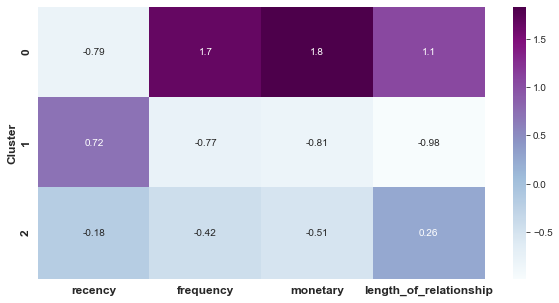

In [114]:
plt.figure(figsize = (10,5))
sns.heatmap(relative_importance, annot=True, cmap='BuPu')
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.ylabel('Cluster', fontsize=12, weight='bold')
plt.show()

> **The heatmap of the relative importance with regards to the metrics affirms the findings from the snake plot**

### Getting the data of customers from the different clusters

In [97]:
cluster0 = customers[customers.cluster == 0].index
cluster1 = customers[customers.cluster == 1].index
cluster2 = customers[customers.cluster == 2].index

In [100]:
data.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,sales,invoicedate2
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00


In [101]:
data = data.set_index('customerid')

### Cluster0 data

In [109]:
mask0 = data.index.isin(cluster0)
cluster0_data = data[mask0]
print('Customers dataset in Cluster 0: {}'.format(cluster0_data.shape))
cluster0_data.head(3)

Customers dataset in Cluster 0: (281652, 9)


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,country,sales,invoicedate2
customerid,,,,,,,,,
13047.0,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,United Kingdom,54.08,2010-12-01 08:34:00
13047.0,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,United Kingdom,12.60,2010-12-01 08:34:00
13047.0,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,United Kingdom,12.60,2010-12-01 08:34:00


### Cluster1 data

In [108]:
mask1 = data.index.isin(cluster1)
cluster1_data = data[mask1]
print('Customers dataset in Cluster 1: {}'.format(cluster1_data.shape))
cluster1_data.head(3)

Customers dataset in Cluster 1: (35387, 9)


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,country,sales,invoicedate2
customerid,,,,,,,,,
15100.0,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,United Kingdom,350.40,2010-12-01 09:09:00
18074.0,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2010-12-01 09:53:00,6.45,United Kingdom,19.35,2010-12-01 09:53:00
18074.0,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2010-12-01 09:53:00,0.65,United Kingdom,31.20,2010-12-01 09:53:00


### Cluster2 data

In [107]:
mask2 = data.index.isin(cluster2)
cluster2_data = data[mask2]
print('Customers dataset in Cluster 2: {}'.format(cluster2_data.shape))
cluster2_data.head(3)

Customers dataset in Cluster 2: (80845, 9)


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,country,sales,invoicedate2
customerid,,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12-01 08:26:00
17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12-01 08:26:00
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12-01 08:26:00


<div class='alert alert-info'>
<h1>7. Conclusion and Recommendation</h1>     

<p style='font-size:15px;'>
<b><em>Customers were grouped into 3 segments using Kmeans Clustering Algorithm.
With the insights gained from the cluster analysis, We recommend that the Retail Shop put up strategies to increase the satisfaction of customers in cluster 0, the best and most loyal customers since its easier to maintain than gain customers. In so doing, customer satisfaction would be attained and sales increased.</em></b>
</p>
  
<p style='font-size:15px;'>
<b><em>Strategies can also be put up to attract customers in cluster 2, the next best customers of the Retail Shop. With that, these customer can move up to cluster 0, and that means increase in sales and customer satisfaction.</em></b>
</p>
<p style='font-size:15px;'>    
<b><em>We also recommend that analytical investigations be done concerning cluster 1 customers in order to know why the are not so loyal and strategies be put up to draw them in.</em></b>
</p>
<h2 style='text-align: center;'>Thank you</h2>
</div>